## Unsupervised Learning
Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data Without labelled responses.
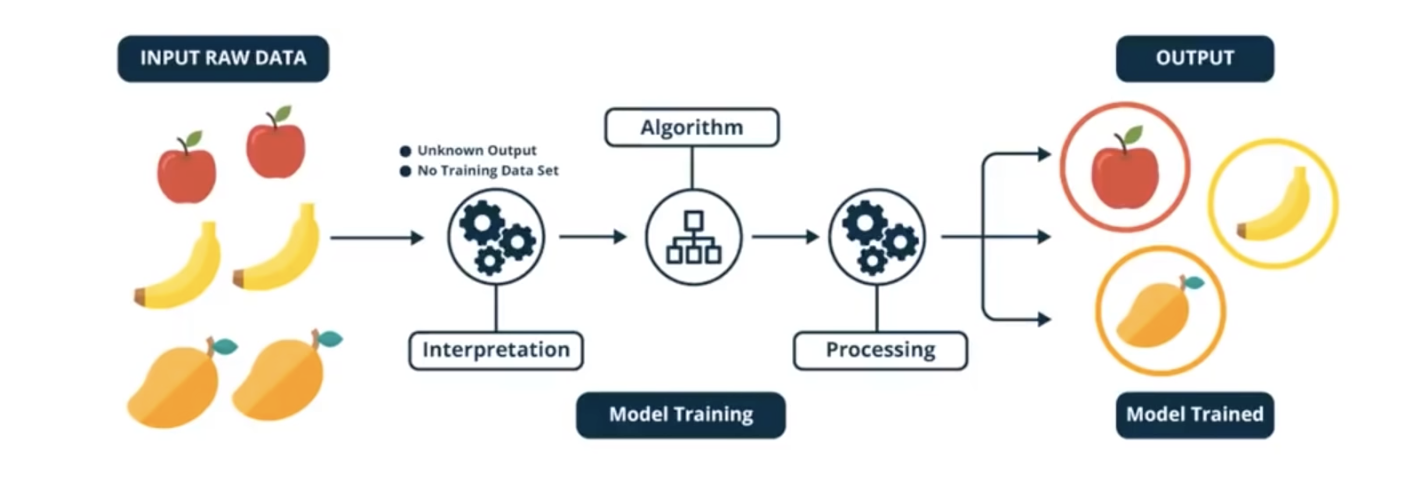

### Clustering
Clustering is the process of dividing the datasets into groups, consisting of similar data-points.<br>
It means grouping of objects based on the information found in the data, describing the objects or their relationship.<br>
The goal of clustering is to determine the intrinsic grouping in a set of Unlabelled Data.<br>
Partitioning is one use of clustering.<br>

### Types of Clustering
<b>•Exclusive Clustering</b> K-Means Clustering<br>
<b>•Overlapping Clustering</b> Fuzzy, C-Means Clustering<br>
<b>•Hierarchical Clustering</b> Aglomarative and Divisive<br>

### K-Means Clustering
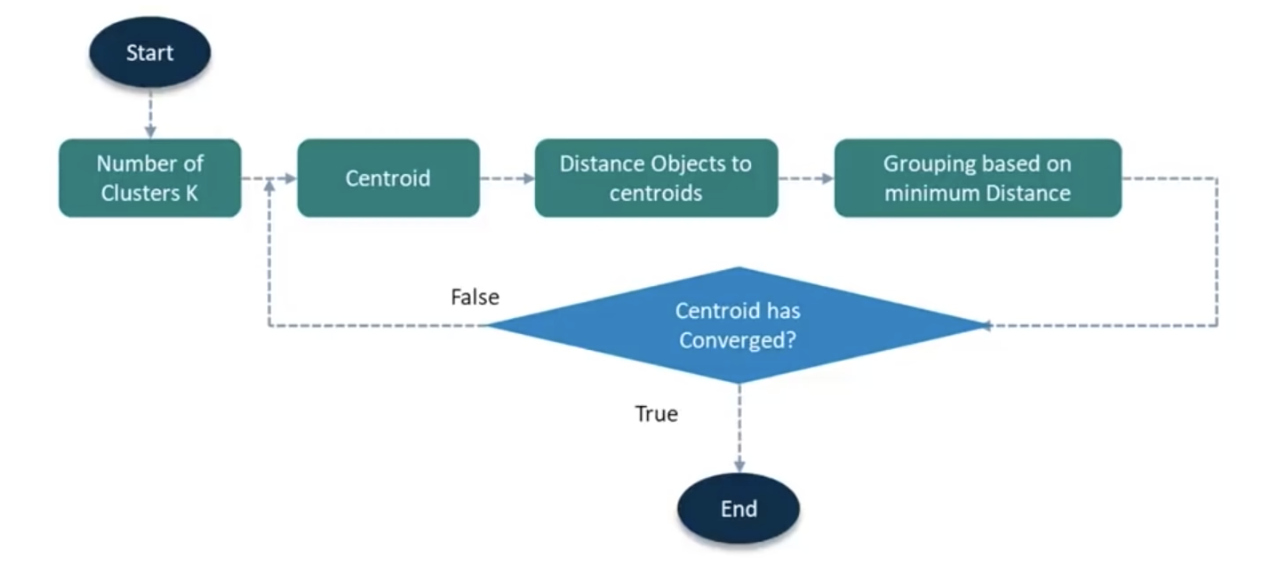

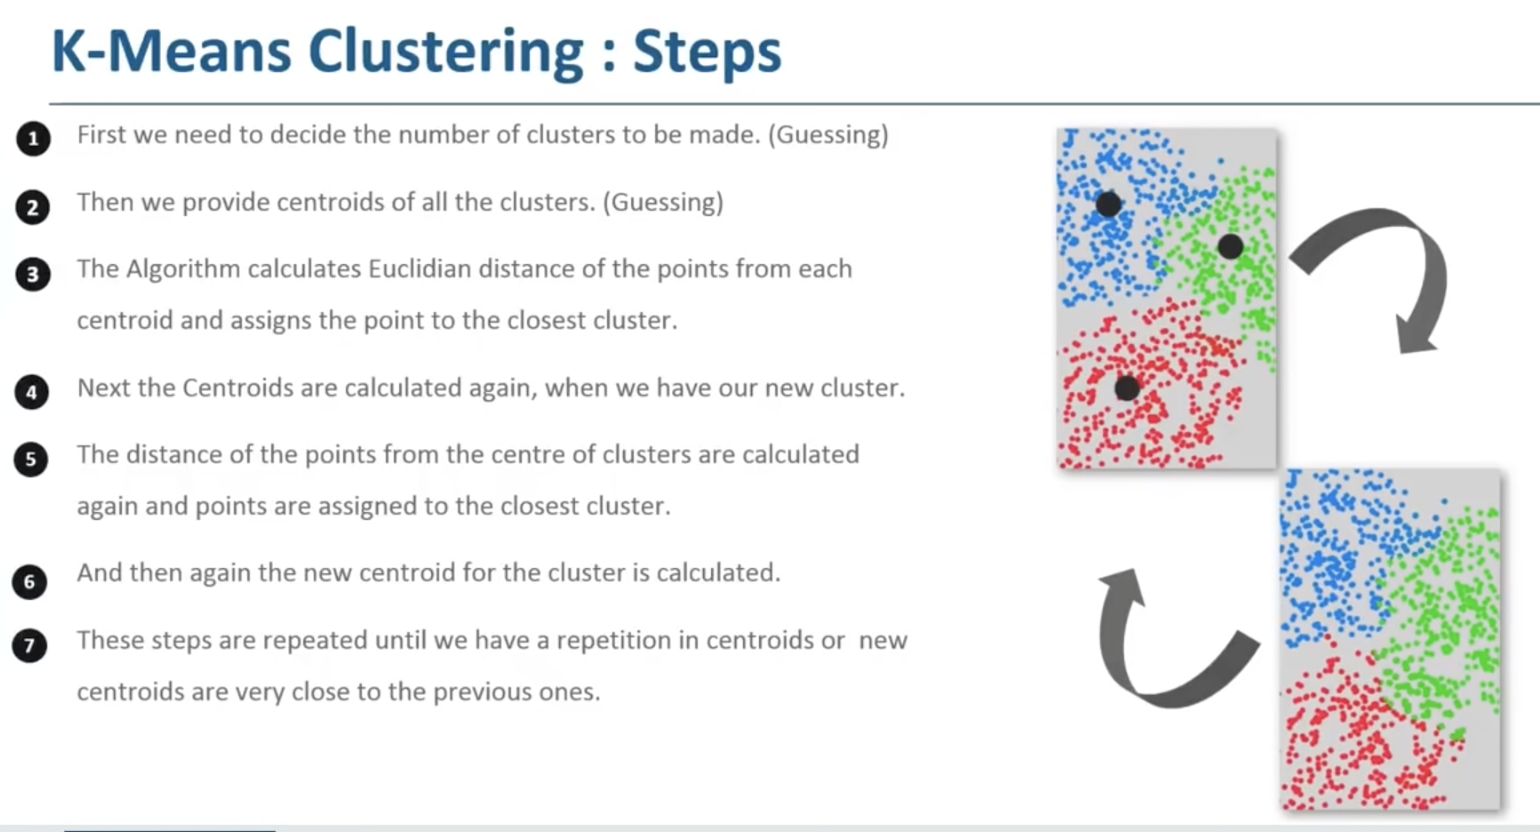

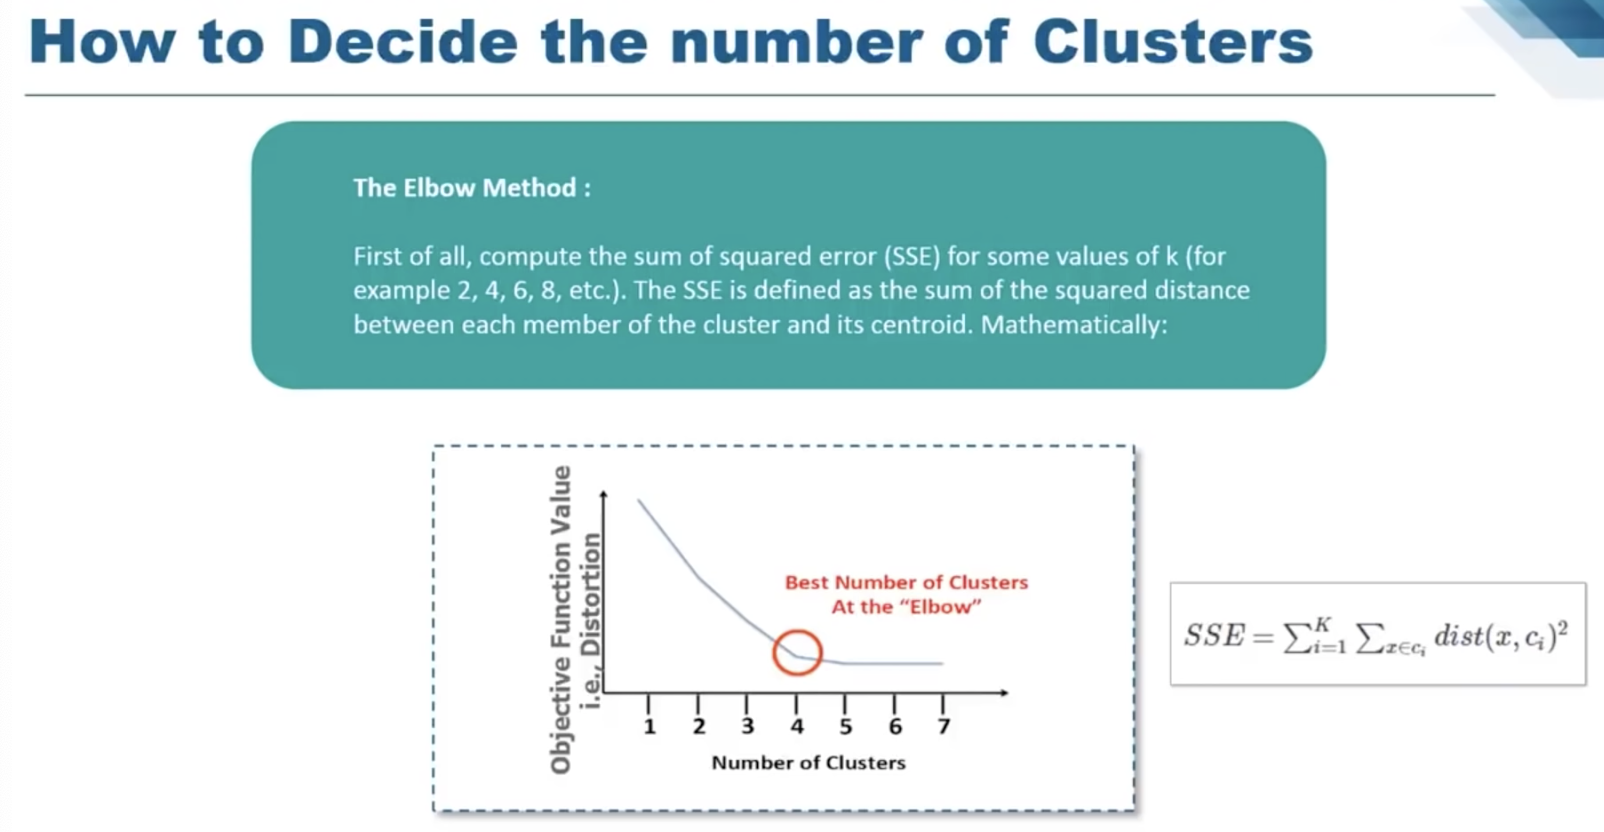

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set ()
# for plot stycing
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(16,9)
plt.style.use("ggplot")
#importing the dataset
data = pd.read_csv('./movie_metadata.csv')
print (data.shape)
data.head(5)


(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [3]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [4]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
new_data = data.iloc[:,4:6]
print(new_data.shape)

print(new_data.isnull().sum())
new_data.head()

(5043, 2)
director_facebook_likes    104
actor_3_facebook_likes      23
dtype: int64


,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN


In [6]:
new_data.dropna(inplace=True)
print(new_data.shape)
new_data.isnull().sum()

(4919, 2)


director_facebook_likes    0
actor_3_facebook_likes     0
dtype: int64

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(new_data)

KMeans(n_clusters=2)

In [8]:
model.cluster_centers_

array([[  154.98796961,   620.70915998],
       [14668.50828729,  1449.50276243]])

In [9]:
print(len(model.labels_))
print(model.labels_)

4919
[0 0 0 ... 0 0 0]


/Users/amitabhpriyadarshi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amitabhpriyadarshi/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


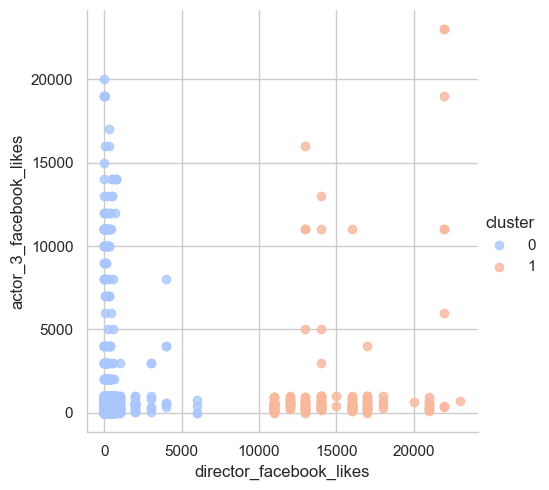

In [10]:
new_data ['cluster'] = model.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes','actor_3_facebook_likes',
           data=new_data,hue='cluster',palette='coolwarm',
           size=5,aspect=1,fit_reg=False)

## C-Means Clustering
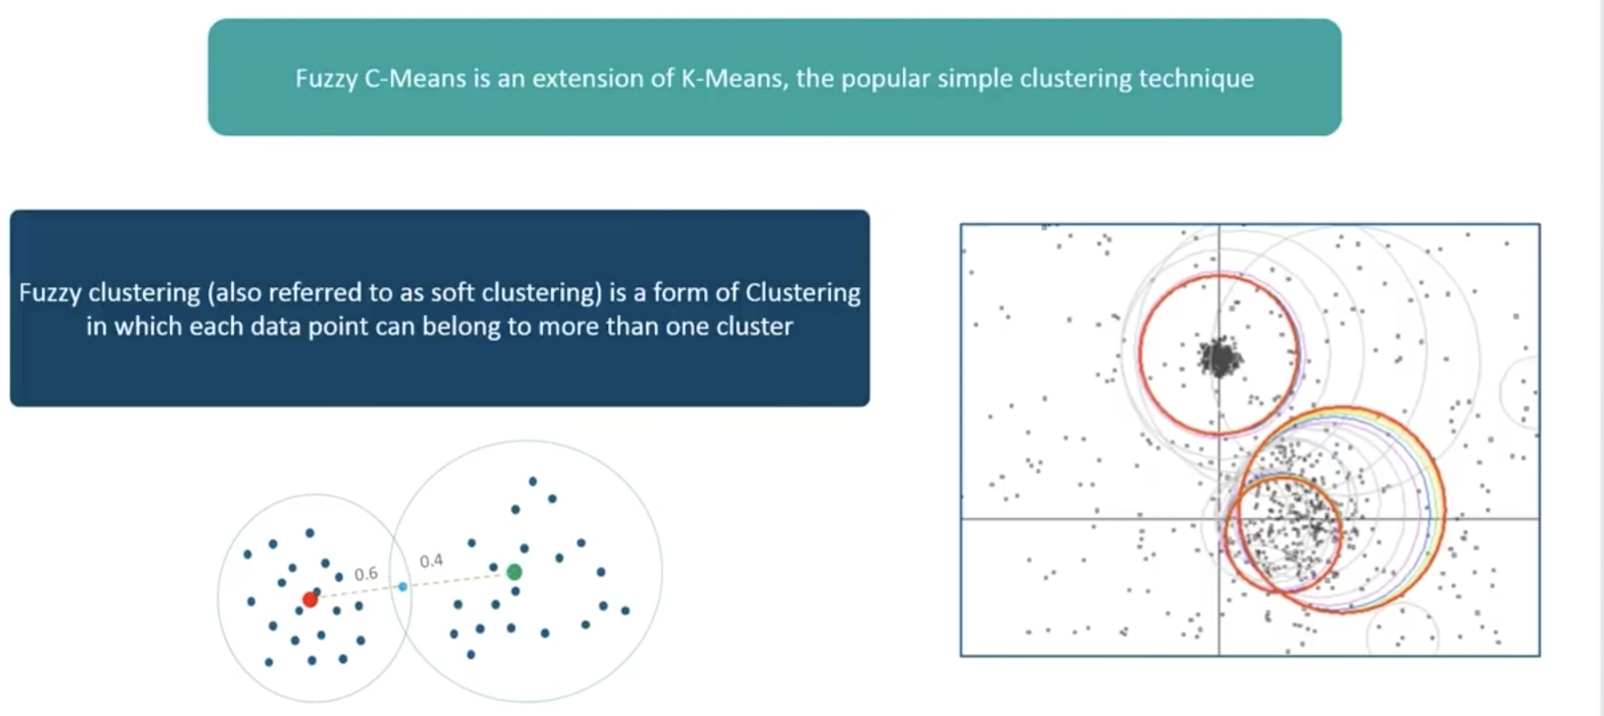

In [11]:
## Hierarchical Clustering
